In [268]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from IPython.display import display

### 0) Описание задачи

В датасете содержатся данные об обучающихся (такие, как количество часов обучения, количество часов сна, наличие доступа к интернету и т. д.). Задача состоит в том, чтобы по данным из датасета определить, сдаст обучающийся экзамен или нет. Экзамен считается сданным, если набрано ≥ 70 баллов.

### 1) Считывание данных

In [269]:
url = "https://raw.githubusercontent.com/aartyomm/ml_2025/refs/heads/master/StudentPerformanceFactors.csv"
data_raw = pd.read_csv(url)

In [270]:
data_raw['Exam_Passed'] = data_raw['Exam_Score'].apply(lambda x: 1 if x >= 70 else 0)
data_raw.drop(columns=['Exam_Score'], inplace=True)

In [271]:
print(data_raw.shape)
data_raw

(6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Passed
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,0
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,0
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,1
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,1
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,0
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,0
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,0
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,0


In [272]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

В таблице есть такие столбцы

- `Hours_Studied` - количество часов, потраченных на учебу в неделю
- `Attendance` - процент посещенных занятий
- `Parental_Involvement` - уровень участия родителей в образовании студента (низкий, средний, высокий)
- `Access_to_Resources` - наличие образовательных ресурсов (низкий, средний, высокий)
- `Extracurricular_Activities` - участие во внеклассной деятельности (да, нет)
- `Sleep_Hours` - среднее количество часов сна за ночь
- `Previous_Sores` - баллы за предыдущие экзамены
- `Motivation_Level` - уровень мотивации студента (низкий, средний, высокий)
- `Internet_Access` - наличие доступа в интернет (да, нет)
- `Tutoring_Sessions` - количество посещенных занятий с репетитором в месяц
- `Family_Income` - уровень дохода семьи (низкий, средний, высокий)
- `Teacher_Quality` - качество работы учителей (низкое, среднее, высокое)
- `School_Type` - тип посещаемой школы (государственная, частная)
- `Peer_Influence` - влияние сверстников на успеваемость (положительное, нейтральное, отрицательное)
- `Physical_Activity` - среднее количество часов физической активности в неделю
- `Learning_Disabilities` - наличие проблем с обучением (да, нет)
- `Parental_Education_Level` - уровень образования родителей (средняя школа, колледж, аспирантура)
- `Distance_from_Home` - расстояние от дома до школы (близко, умеренно, далеко)
- `Gender` - пол обучающегося (мужской, женский)
- `Exam_Score` - Итоговый экзаменационный балл

Заменим тип столбцов `Parental_Involvement`, `Access_to_Resources`, `Extracurricular_Activities`, `Motivation_Level`, `Internet_Access`, `Family_Income`, `Teacher_Quality`, `School_Type`, `Peer_Influence`, `Learning_Disabilities`, `Parental_Education_Level`, `Distance_from_Home`, `Gender` на специальный, предназначенный для хранения категориальных значений

In [273]:
#data_raw['Parental_Involvement'] = data_raw['Parental_Involvement'].astype('category')

# Список столбцов, которые нужно преобразовать
category_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]

# Преобразование всех указанных столбцов в категориальные
data_raw[category_columns] = data_raw[category_columns].apply(lambda x: x.astype('category'))


In [274]:
data_raw['Parental_Involvement'].dtype

CategoricalDtype(categories=['High', 'Low', 'Medium'], ordered=False, categories_dtype=object)

### 2) Визуализация данных и основные характеристки

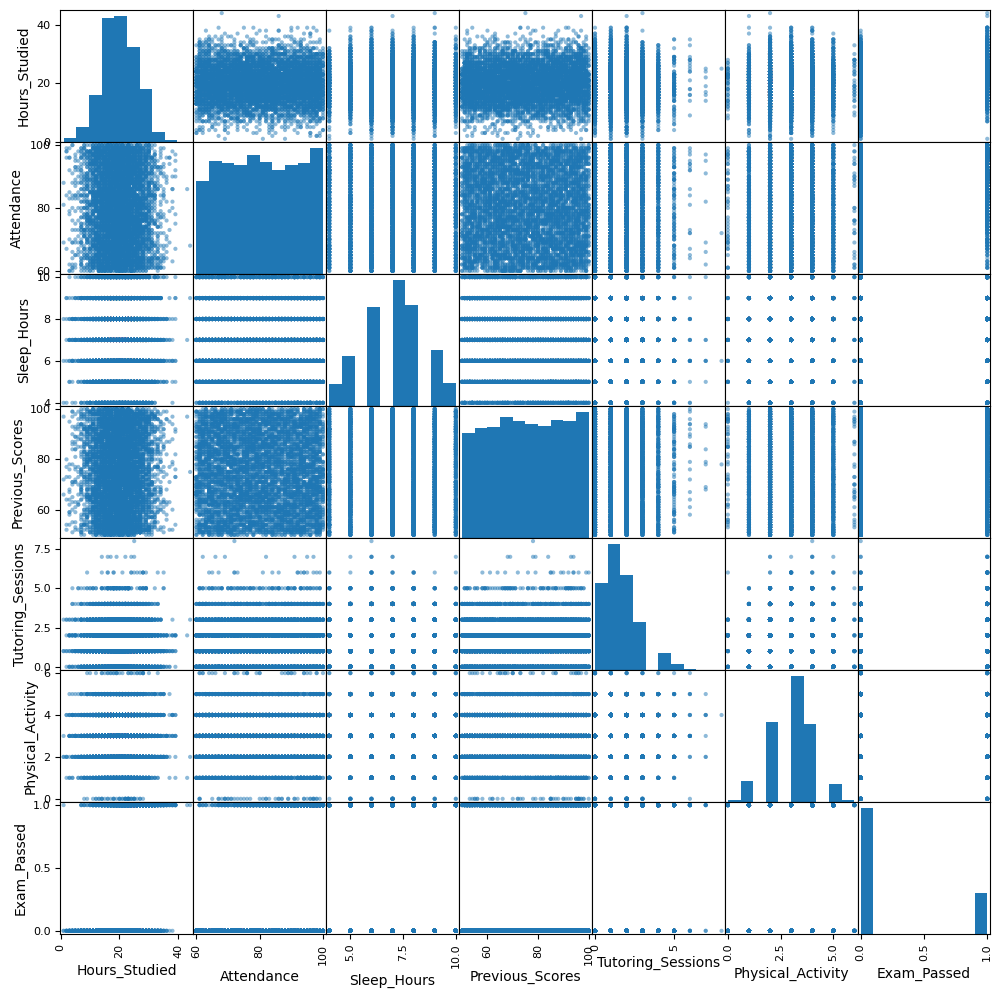

In [275]:
pd.plotting.scatter_matrix(data_raw, figsize = (12, 12))
pass

In [276]:
#data_raw.describe()
display(data_raw.describe())
display(data_raw.describe(include=['category']))

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Passed
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,0.245951
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,0.430682
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,0.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,0.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,0.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,1.000000


,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [277]:
#data_raw.describe(include=['category'])

Матрица корреляции

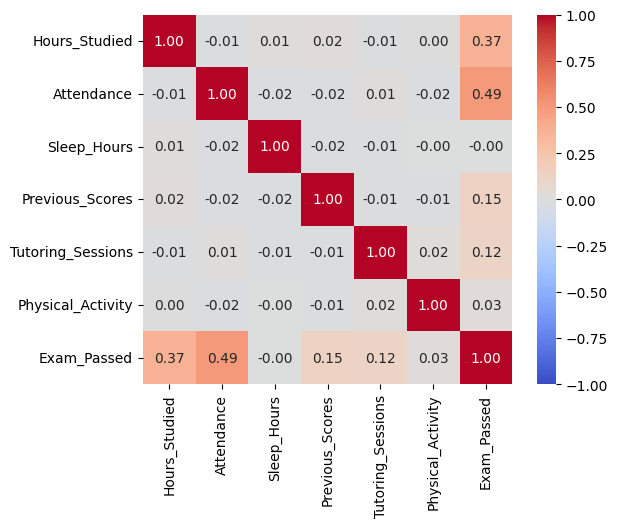

In [278]:
corr_mat = data_raw.corr(numeric_only=True)
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

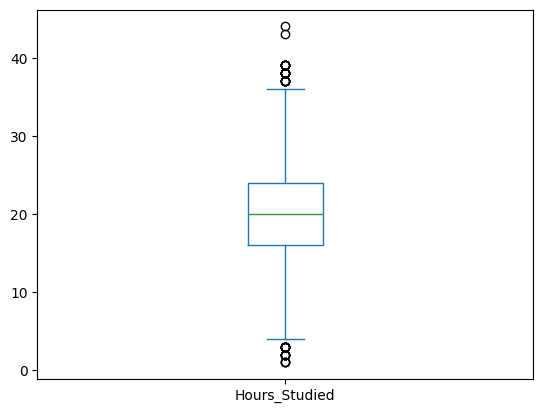

In [279]:
data_raw['Hours_Studied'].plot(kind='box')
pass

In [280]:
data_raw['Hours_Studied'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Hours_Studied
0.005,4.0
0.010,6.0
0.050,10.0
0.100,12.0
0.500,20.0
0.900,28.0
0.950,30.0
0.990,34.0
0.995,35.0


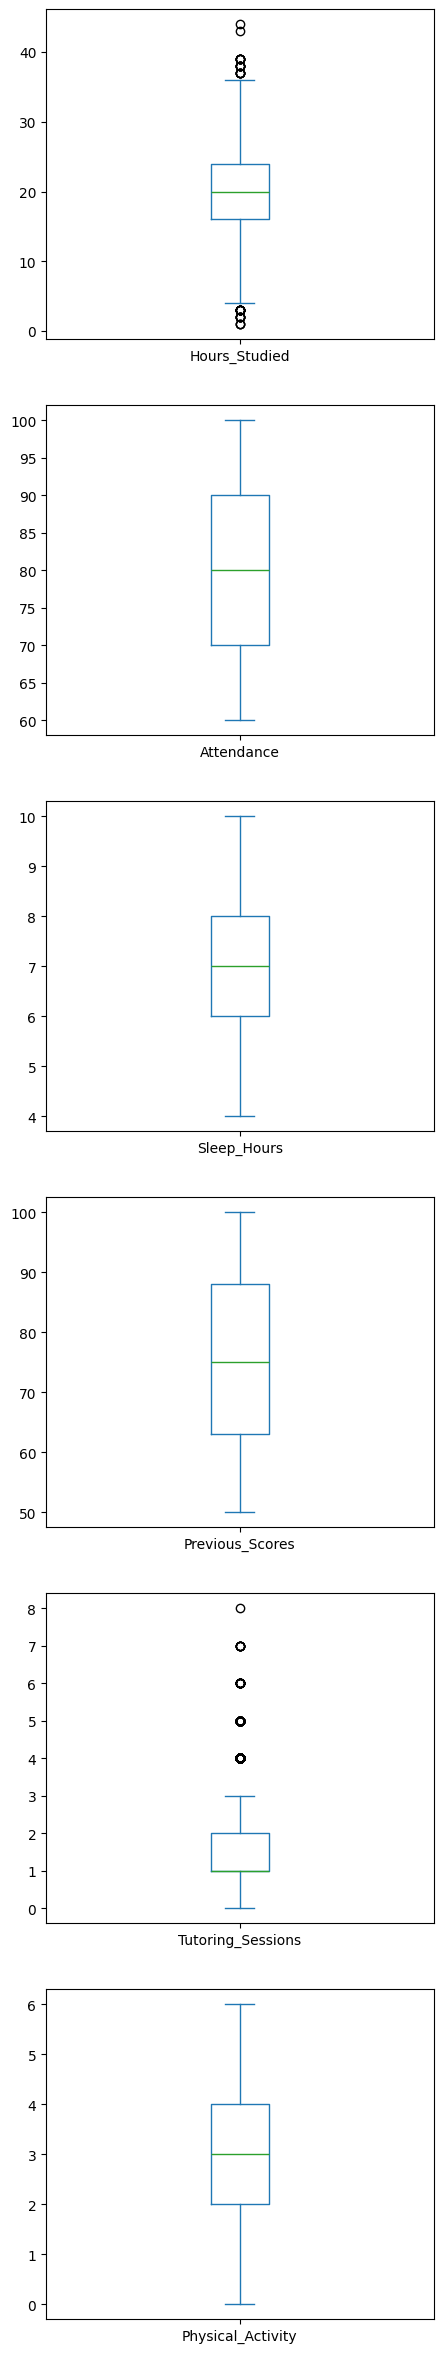

In [281]:
#data_raw.select_dtypes(include='int64').plot.box(figsize=(10, 6), rot=45, title="Ящики с усами для числовых столбцов")
data_raw.select_dtypes(include='number').loc[:, data_raw.select_dtypes(include='number').columns != 'Exam_Passed'].plot.box(subplots=True,
                                            layout=(len(data_raw.select_dtypes(include='number').columns) - 1, 1),
                                            figsize=(5, (len(data_raw.select_dtypes(include='number').columns) - 1) * 5))
pass

В датасете можно наблюдать несколько столбцов с подозрениями на выбросы (`Hours_Studied`, `Sleep_Hours`, `Tutoring_Sessions`), однако, все значения лежат в рамках допустимых. А количество тех значений, которые лежат вне "усов" ящика, небольшое.

По матрице корреляции можно видеть, что парметры не коррелируют между собой, а с `Exam_Passed` коррелируют все праметры, кроме `Sleep_Hours`и `Physical_Activity`.  
Низкая корреляция между параметрами говорит о том, что парметры независимы между собой - каждый параметр может вносить уникальную информацию в модель, не дублируя информацию, содержащуюся в других признаках. Это может быть полезно для некоторых моделей, таких как дерево решений и его ансамбли (например, случайный лес) и вызывать трудности у линейных моделей.  
В датасете `Attendance` и `Hours_Studied` имеют умеренную корреляцию с целевым параметром `Exam_Passed`. Это может говорить о том, что сдача экзамена обусловлена совокупностью факторов, а не одним-двумя ключевыми параметрами.
Такие признаки, как `Sleep_Hours`, `Physical_Activity` оказывают минимальное влияние на сдачу экзамена и не сильно связаны с другими параметрами. Это может означать, что их влияние на результат также невелико.  
Отсутствие корреляции между признаками может говорить о том, что в данных присутствуют нелинейные зависимости, которые трудно выявить с помощью простого анализа корреляций. В этом случае нелинейные модели, такие как градиентный бустинг, случайный лес, нейронные сети, могут лучше улавливать сложные зависимости между признаками и целевым значением.

### 3) Обработка пропущенных значений

In [282]:
display(data_raw.isnull().sum())
#display(data_raw.isnull())

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [283]:
from sklearn.impute import SimpleImputer
#imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data = data_raw
imp_cat.fit(data[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']])
data[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']] = imp_cat.transform(data[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']])

#numeric_cols = data.select_dtypes(include=['float64']).columns
#categorical_cols = data.select_dtypes(include=['category']).columns
#imp_num.fit(data[numeric_cols])
#imp_cat.fit(data[categorical_cols])
#print(numeric_cols)
#print(categorical_cols)

display(data.isnull().sum())

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


### 4) Обработка категориальных признаков

In [284]:
data_proc = data
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(data_proc[category_columns])

dummies = pd.DataFrame(enc.transform(data_proc[category_columns]),
                       columns=enc.get_feature_names_out(), index=data_proc.index)
dummies.head()

,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Motivation_Level_High,Motivation_Level_Low,Motivation_Level_Medium,...,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [285]:
data_proc = pd.concat((data_proc, dummies), axis=1).drop(category_columns, axis=1)
data_proc.head()
data_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hours_Studied                          6607 non-null   int64  
 1   Attendance                             6607 non-null   int64  
 2   Sleep_Hours                            6607 non-null   int64  
 3   Previous_Scores                        6607 non-null   int64  
 4   Tutoring_Sessions                      6607 non-null   int64  
 5   Physical_Activity                      6607 non-null   int64  
 6   Exam_Passed                            6607 non-null   int64  
 7   Parental_Involvement_High              6607 non-null   float64
 8   Parental_Involvement_Low               6607 non-null   float64
 9   Parental_Involvement_Medium            6607 non-null   float64
 10  Access_to_Resources_High               6607 non-null   float64
 11  Acce

### 5) Нормализация

In [286]:
numeric_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions' , 'Physical_Activity']
data_proc[numeric_columns] = (data_proc[numeric_columns] - data_proc[numeric_columns].mean(axis = 0))/data_proc[numeric_columns].std(axis = 0)
data_proc[numeric_columns].describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
count,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03
mean,-1.226001e-16,-3.043493e-16,-1.898150e-16,2.054089e-16,5.108337e-17,1.505615e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.167520e+00,-1.730027e+00,-2.063223e+00,-1.741035e+00,-1.213843e+00,-2.877735e+00
25%,-6.635951e-01,-8.640372e-01,-7.009372e-01,-8.382439e-01,-4.012113e-01,-9.383058e-01
50%,4.118256e-03,1.952967e-03,-1.979408e-02,-4.898077e-03,-4.012113e-01,3.140895e-02
75%,6.718316e-01,8.679432e-01,6.613490e-01,8.978932e-01,4.114199e-01,1.001124e+00
max,4.010399e+00,1.733933e+00,2.023635e+00,1.731239e+00,5.287208e+00,2.940553e+00


In [287]:
data_proc

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Passed,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,...,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,0.504903,0.348349,-0.019794,-0.143789,-1.213843,0.031409,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,-0.162810,-1.383631,0.661349,-1.116026,0.411420,1.001124,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.671832,1.560735,-0.019794,1.106230,0.411420,1.001124,1,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.506473,0.781344,0.661349,1.592348,-0.401211,1.001124,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.162810,1.041141,-0.700937,-0.699353,1.224051,1.001124,1,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.838760,-0.950636,-0.019794,0.064547,-0.401211,-0.938306,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6603,0.504903,-0.344443,0.661349,0.411775,1.224051,-0.938306,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6604,0.004118,0.867943,-0.700937,-0.699353,1.224051,-0.938306,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6605,-1.665165,0.521547,-0.700937,1.106230,0.411420,0.031409,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### 6) Разбивка данных на обучающую и тестовую выборки

In [288]:
X = data_proc.drop(['Exam_Passed'], axis=1)
y = data['Exam_Passed']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, d = X_train.shape
N_test,  d = X_test.shape

N_train, N_test, d

(4955, 1652, 35)

### 7) Запуск классификатора

Подсчёт точности

In [289]:
from sklearn.metrics import accuracy_score

def print_accuracy (y_train, y_train_predict, y_test, y_test_predict):
  # Точность на обучающей выборке
  train_accuracy = accuracy_score(y_train, y_train_predict)
  print(f'Train Accuracy: {train_accuracy:.2f}')

  # Точность на тестовой выборке
  test_accuracy = accuracy_score(y_test, y_test_predict)
  print(f'Test Accuracy: {test_accuracy:.2f}')


res_table = pd.DataFrame(columns=('train', 'test'))
name_of_res_table = "Misclassification rate" #Доля неверных предсказаний

Метод ближайших соседей

Метод был выбран, так как он принимает решение на основе ближайших объектов в признаковом пространстве - схожие по параметрам ученики, как правило, имеют схожий результат. Метод один из несложных - подходит для реализации первым.

In [290]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

res_train  = np.mean(y_train != y_train_predict)
res_test  = np.mean(y_test != y_test_predict)

res_table.loc['3 Nearest Neighbours', :] = (res_train, res_test)
res_table.style.set_caption(name_of_res_table)

,train,test
3 Nearest Neighbours,0.063976,0.145278


In [291]:
print_accuracy(y_train, y_train_predict, y_test, y_test_predict)

Train Accuracy: 0.94
Test Accuracy: 0.85


Подсчитанные ошибки для пункта 9.

In [292]:
"""
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_predict)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
"""
pass

### 8) Подбор лучшего числа ближайших соседей

In [293]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 13, 14, 15, 16, 17, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.11160760834147931 15


In [294]:
model = KNeighborsClassifier(n_neighbors = 15)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

res_train  = np.mean(y_train != y_train_predict)
res_test  = np.mean(y_test != y_test_predict)

res_table.loc['15 Nearest Neighbours', :] = (res_train, res_test)
print_accuracy(y_train, y_train_predict, y_test, y_test_predict)

Train Accuracy: 0.91
Test Accuracy: 0.88


Подсчитанные ошибки для пункта 9.

---

Подсчёт метрик и составление матрицы ошибок для пункта 11.

Метрики
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1223
           1       0.91      0.60      0.72       429

    accuracy                           0.88      1652
   macro avg       0.89      0.79      0.82      1652
weighted avg       0.88      0.88      0.87      1652

Матрица ошибок


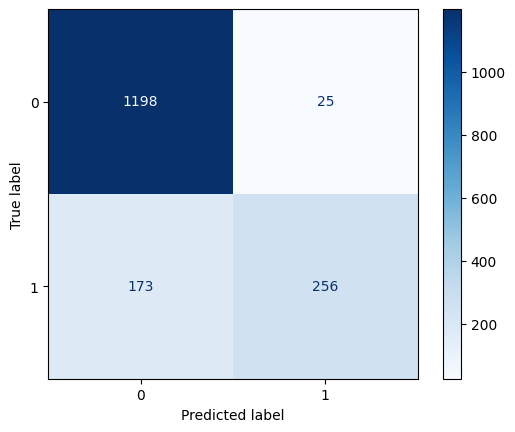

In [295]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

print("Метрики")
print(classification_report(y_test, y_test_predict))

print("Матрица ошибок")
cm = confusion_matrix(y_test, y_test_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Оптимальное количество ближайших соседей - 15  
При таком количестве достигается наименьшая ошибка на тестовой выборке





### 9) Вычисление ошибок на обучающей и тестовой выборках

В пунктах 7 и 8 были подсчитаны ошибки на выборках:  

3 ближайших соседа:   
Train Accuracy: 0.94   
Test Accuracy: 0.85

15 ближайших соседей:   
Train Accuracy: 0.91   
Test Accuracy: 0.88

### 10) Запуск других классификаторов

Случайный лес использует случайный отбор признаков для построения каждого дерева, что позволяет ему выявлять наиболее важные признаки для классификации. Метод k-NN не выполняет отбор признаков и может включать нерелевантные или избыточные признаки, что может ухудшать его производительность.  
При наличии несбалансированных классов случайный лес может лучше справляться с задачей классификации, поскольку он учитывает информацию о классе в процессе построения деревьев. K-NN может быть менее эффективным в таких случаях.  
Исходя из выводов, сделанных по матрице корреляции и того, что классы в датасете несбалансированы, можно предположить, что случайный лес будет работать точнее метода ближайших соседей.

Случайный лес

In [296]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

res_train  = np.mean(y_train != y_train_predict)
res_test  = np.mean(y_test != y_test_predict)
res_table.loc['Random Forest', :] = (res_train, res_test)
print_accuracy(y_train, y_train_predict, y_test, y_test_predict)

Train Accuracy: 1.00
Test Accuracy: 0.91


Случайный лес показал лучшую точность как на тренировочной, так и на тестовой выборке.  


---



Полносвязная нейронная сеть

In [297]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=1000)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

res_train  = np.mean(y_train != y_train_predict)
res_test  = np.mean(y_test != y_test_predict)
res_table.loc['MLP', :] = (res_train, res_test)
print_accuracy(y_train, y_train_predict, y_test, y_test_predict)

Train Accuracy: 1.00
Test Accuracy: 0.97


In [298]:
display(res_table.style.set_caption(name_of_res_table))

,train,test
3 Nearest Neighbours,0.063976,0.145278
15 Nearest Neighbours,0.092432,0.119855
Random Forest,0.000000,0.087772
MLP,0.002220,0.029056


### 11) Борьба с несбалансированностью классов

In [299]:
!pip install imbalanced-learn

Рассмотрим на примере метода ближайших соседей.

Применим синтетическое увеличение меньшего класса - SMOTE.

При несбалансированных классах параметр accuracy может не точно отражать ситуацию, поэтому будем вычислять и другие метрики, например, precision, recall.

Подбираем лучшее соотношение классов.

In [300]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import numpy as np

# Инициализация SMOTE - создаст новые точки для редкого класса, пока соотношение не станет заданным
#smote = SMOTE(random_state=42) #sampling_strategy=1, соотношение 50/50, при тестировании показало результаты хуже
                                #(лучше находится меньший класс, но много ложных срабатываний)
smote = SMOTE(sampling_strategy=0.5, random_state=42)

# Генерация новые данные только для обучающей выборки
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Обучение на сбалансированных данных
model = KNeighborsClassifier(n_neighbors = 15)
model.fit(X_train_resampled, y_train_resampled)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

res_train = np.mean(y_train != y_train_predict)
res_test  = np.mean(y_test != y_test_predict)

res_table.loc['15 NN + SMOTE', :] = (res_train, res_test)
print_accuracy(y_train, y_train_predict, y_test, y_test_predict)

Train Accuracy: 0.91
Test Accuracy: 0.89


Показатели точности не ухудшились.

Метрики
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1223
           1       0.76      0.82      0.79       429

    accuracy                           0.89      1652
   macro avg       0.85      0.87      0.86      1652
weighted avg       0.89      0.89      0.89      1652

Матрица ошибок


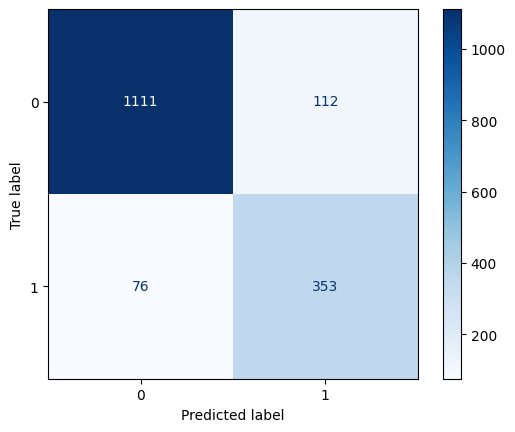

In [301]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

print("Метрики")
print(classification_report(y_test, y_test_predict))

print("Матрица ошибок")
cm = confusion_matrix(y_test, y_test_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Сравним с метриками, полученными без использования SMOTE (из пункта 8):

                   precision    recall  f1-score   support

                0       0.87      0.98      0.92      1223
                1       0.91      0.60      0.72       429

         accuracy                           0.88      1652
        macro avg       0.89      0.79      0.82      1652
     weighted avg       0.88      0.88      0.87      1652


Произошла небольшая потеря в precision, но увеличился recall. Как видно и по матрице ошибок, ошибки сбалансировались по разным классам - теперь нет такого, что большинство из них приходится при определении одного из классов.

### 12) Исключение коррелированных переменных

Сильно коррелирующие признаки несут в себе практически одну и ту же информацию. Если включить их оба в модели, это может сделать оценки весов признаков очень нестабильными и трудными для интерпретации. Модель не сможет однозначно определить, какой из двух признаков действительно важен.

Небольшие изменения в данных могут сильно менять веса модели  
Интерпретация признаков усложняется — непонятно, какой из них действительно влияет на результат  
Может ухудшать качество обучения, особенно для линейных моделей  

---



Построим матрицу корреляции

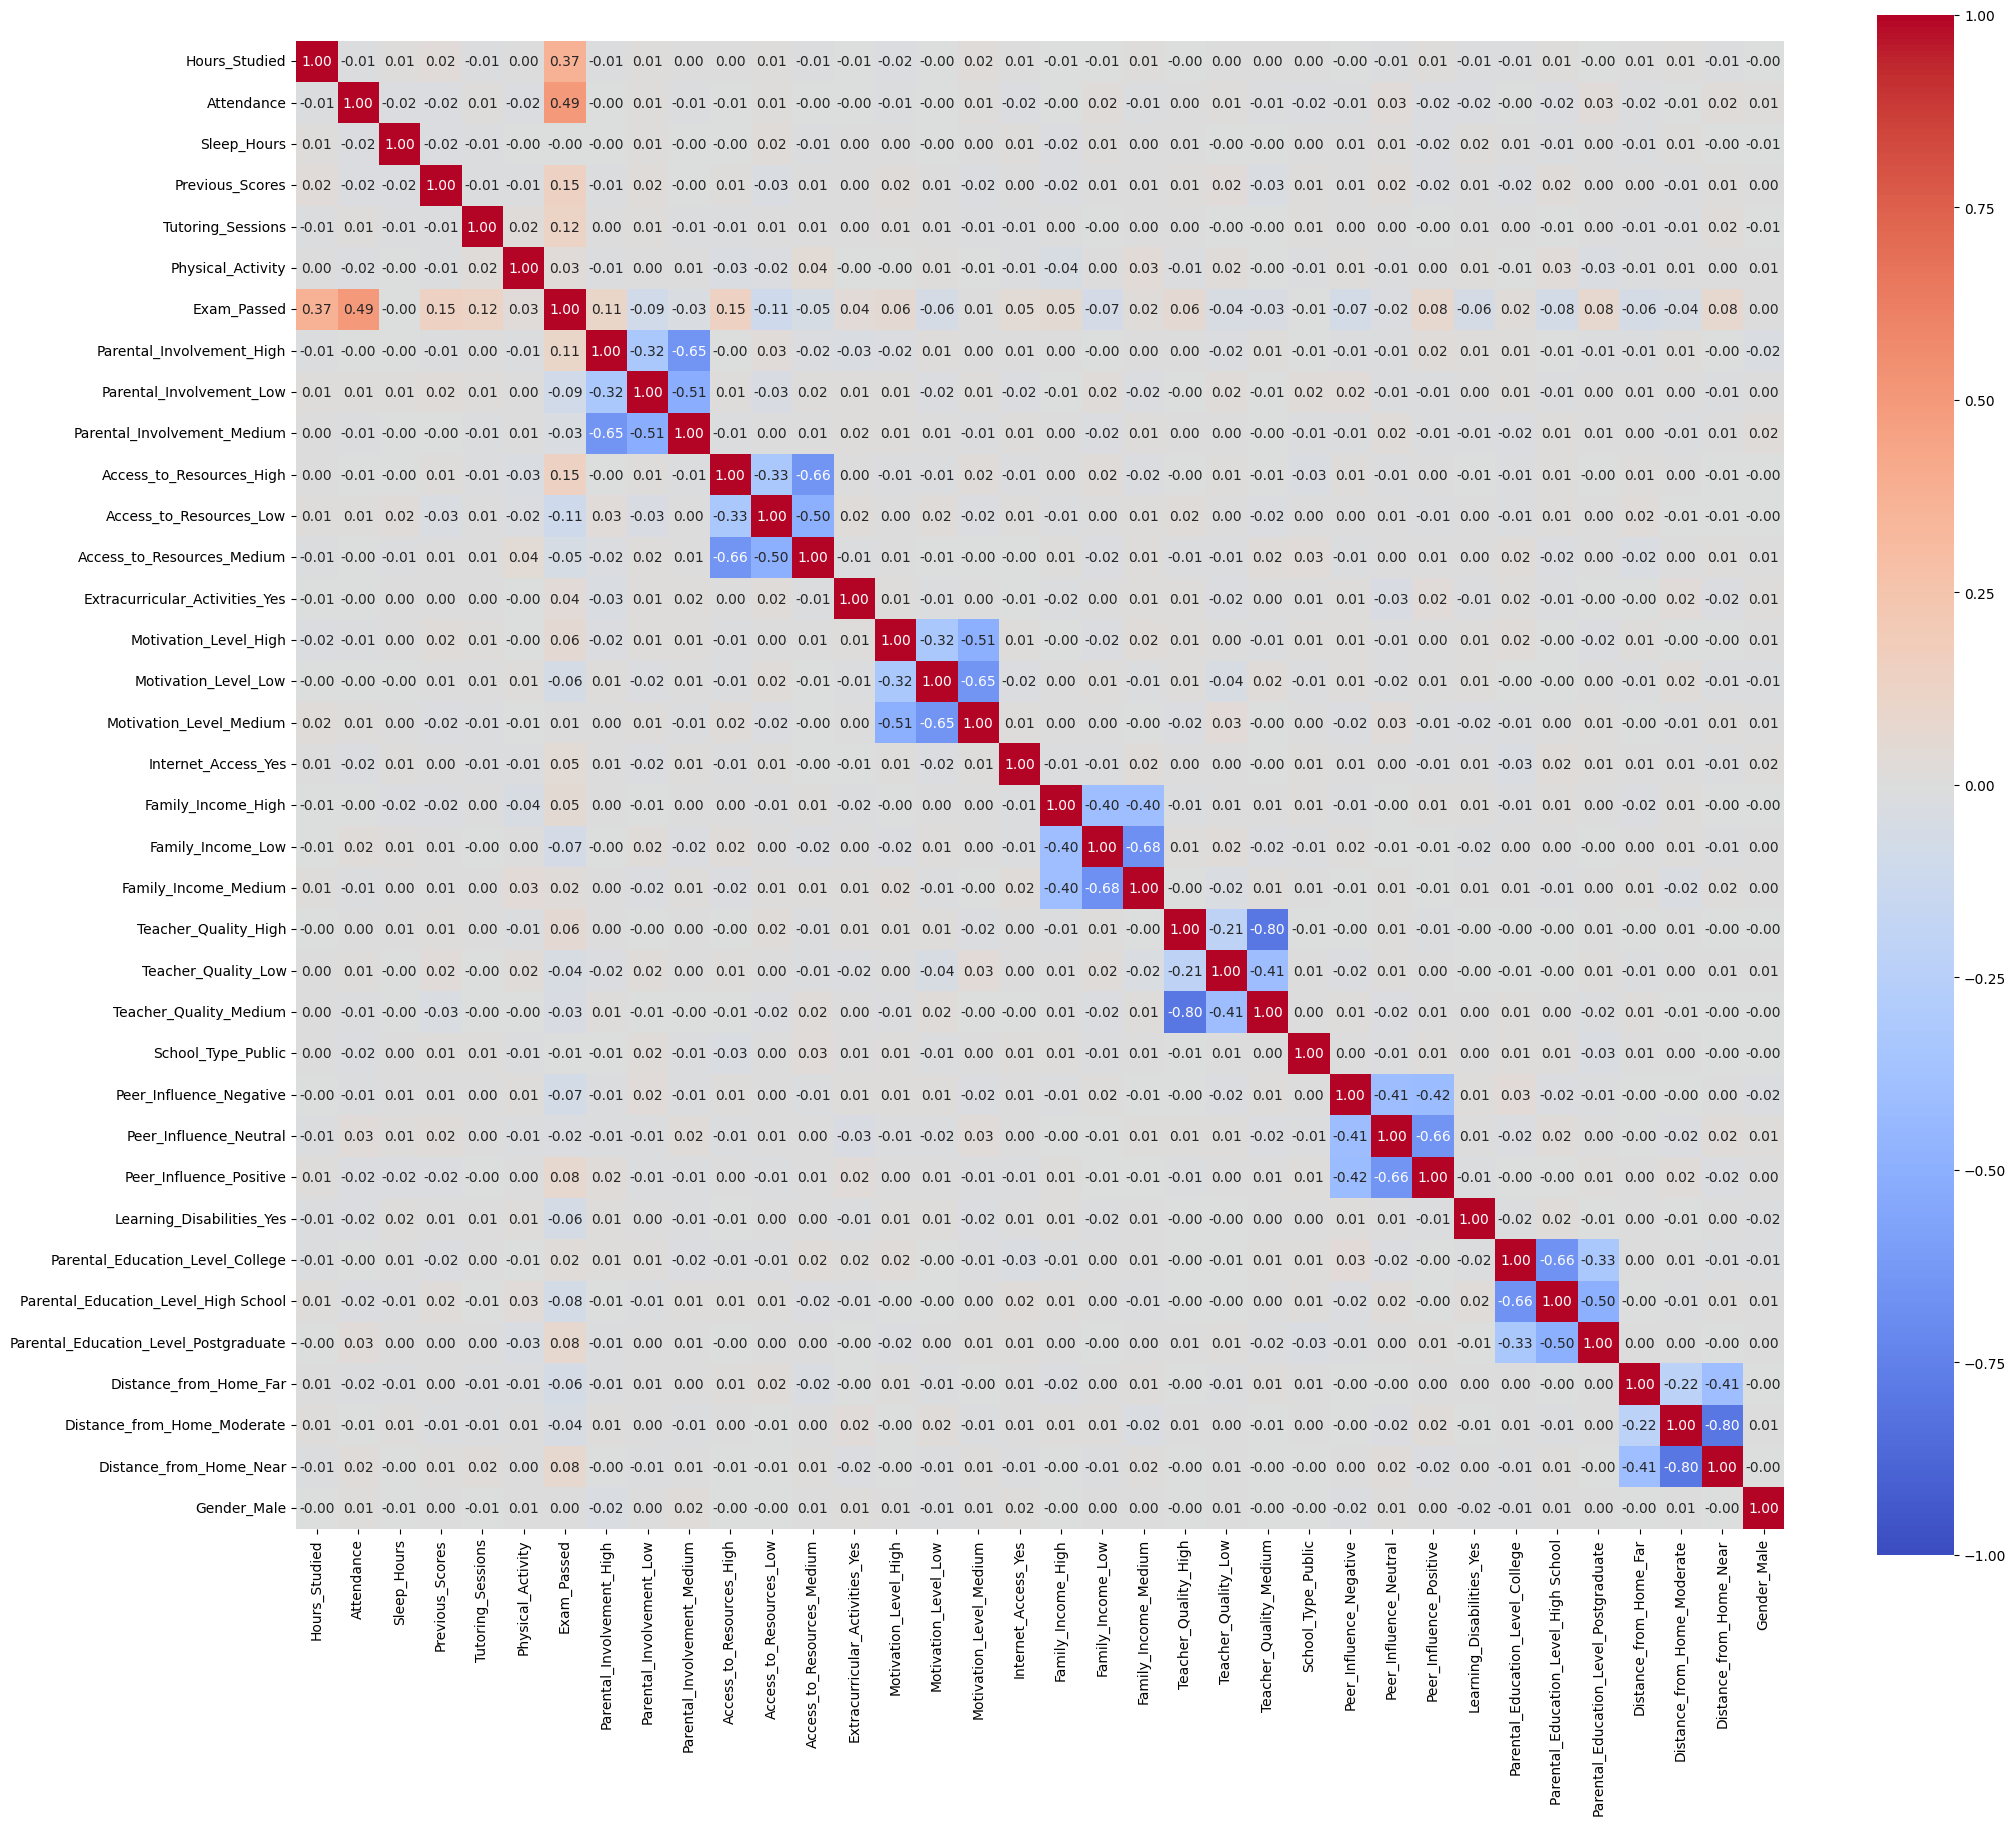

In [302]:
corr_mat = data_proc.corr(numeric_only=True)
plt.figure(figsize=(24, 20))
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

В данном датасете корреляция между признаками достаточно маленькая, но можно исключить коррелированные переменные способом, описанным ниже:

In [303]:
correlation_threshold = 0.9

correlation_matrix = X.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]

X_filtered = X.drop(columns=to_drop)

print(f"Удалено {len(to_drop)} признаков из {X.shape[1]}")

print("Удалённые признаки:", to_drop if to_drop else "Нет")

Удалено 0 признаков из 35
Удалённые признаки: Нет


### 13) Общие выводы

В ходе работы были: обработаны категориальные признаки, устранены пропщенные значения, выполнена нормализация и балансировка классов. Также была проанализирована корреляция признаков и сделан вывод об отсутствии сильной линейной зависимости между большинством признаков и целевой переменной.

Для решения задачи классификации были протестированы три модели: метод k-ближайших соседей, случайный лес и полносвязная нейронная сеть.

По результатам сравнения качества на обучающей и тестовой выборках можно сделать следующие выводы:

Лучше всех себя показала полносвязная нейронная сеть. Случайный лес исключил ошибки на тренировочной выборке, но имеет большее количество ошибок на тестовой выборке. Метод ближайших соседей показал себя хуже всех. (Однако ошибка в приведённыхпримерах не превышает 15%)

Такие результаты объясняются тем, что в данном наборе данных отсутствует корреляция между признаками. Как говорилось выше, это может говорить о том, что в данных присутствуют нелинейные зависимости, которые трудно выявить с помощью простого анализа корреляций. В этом случае нелинейные модели лучше улавливают сложные зависимости между признаками и целевым значением, что и продемонстрировали примеры.

Устранение несбалансированности классов позволяет сбалансировать классификацию.

Несмотря на различия в алгоритмах, ошибка ни у одной из моделей не превышает 15%, что говорит о приемлемом качестве классификации и корректности выбранного подхода к предварительной обработке данных.

# **Задача кластеризации**

Запустим алгоритмы KMeans, DBSCAN и Agglomerative Clustering на тех же данных и выведем оценки Adjusted Rand Index (ARI) и Normalized Mutual Information (NMI).


ARI измеряет степень совпадения кластеров с истинными метками. Значения лежат в диапазоне от -1 до 1:

    1: идеальное совпадение кластеров с истинными метками.
    0: результат, эквивалентный случайному разбиению.
    Отрицательные значения: хуже, чем случайное разбиение.

NMI измеряет степень взаимной информации между полученными кластерами и истинными метками. Значения находятся в диапазоне от 0 до 1:

    1: полное совпадение кластеров и истинных меток.
    0: отсутствует взаимосвязь.

In [304]:
X_clust = X

In [305]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np

# Применение метода кластеризации KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_clust)

# Применение метода кластеризации DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_clust)

# Применение метода кластеризации Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_clust)

# Оценка качества кластеризации
metrics = {
    'Adjusted Rand Index (ARI)': adjusted_rand_score,
    'Normalized Mutual Information (NMI)': normalized_mutual_info_score
}

results = {}
for name, func in metrics.items():
    results[name] = {
        'KMeans': func(y, kmeans_labels),
        'DBSCAN': func(y, dbscan_labels),
        'Agglomerative': func(y, agglo_labels)
    }

# Печать результатов
for metric, scores in results.items():
    print(f"{metric}:")
    for method, score in scores.items():
        print(f"  {method}: {score:.2f}")

Adjusted Rand Index (ARI):
  KMeans: 0.01
  DBSCAN: 0.00
  Agglomerative: 0.00
Normalized Mutual Information (NMI):
  KMeans: 0.01
  DBSCAN: 0.00
  Agglomerative: 0.00


ARI и NMI опказывают нулевые или околонулевые значения. Это связано с характером входных данных - они плохо подходят для задачи кластеризации.

Построим т-SNE визуализацию (выберем некоторое количество рандомных точек из датасета для наглядности)

т-SNE диаграмма представляет собой двумерное проецирование многомерного пространства с использованием метода t-SNE. Это помогает визуализировать структуры данных, выявлять кластеры и исследовать связи между различными признаками и целевой переменной.

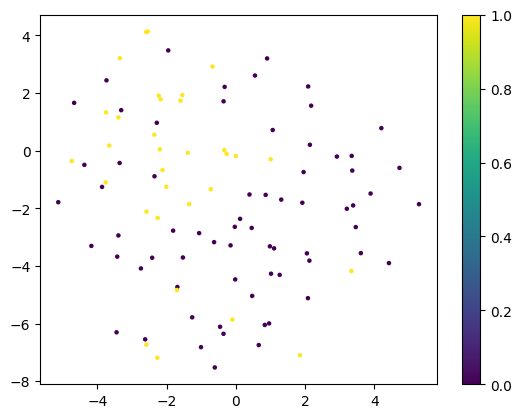

In [306]:
import matplotlib.pyplot as plt
subset = data_proc.sample(n=100, random_state=42)
H = subset.drop(['Exam_Passed'], axis=1)
p = subset['Exam_Passed']

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
H_embedded = tsne.fit_transform(H)

plt.scatter(H_embedded[:, 0], H_embedded[:, 1], c=p, cmap='viridis', s=5)
plt.colorbar()
plt.show()

По графику можно сделать вывод: данные действительно не подходят для кластеризации - группы точек одного цвета на графике плохо отделяются друг от друга.

Попробуем понижение размерности

In [307]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X)

print(f"Исходная размерность: {X.shape[1]}")
print(f"После PCA: {X_pca.shape[1]}")

Исходная размерность: 35
После PCA: 23


In [308]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np

# Применение метода кластеризации KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Применение метода кластеризации DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

# Применение метода кластеризации Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_pca)

# Оценка качества кластеризации
metrics = {
    'Adjusted Rand Index (ARI)': adjusted_rand_score,
    'Normalized Mutual Information (NMI)': normalized_mutual_info_score
}

results = {}
for name, func in metrics.items():
    results[name] = {
        'KMeans': func(y, kmeans_labels),
        'DBSCAN': func(y, dbscan_labels),
        'Agglomerative': func(y, agglo_labels)
    }

# Печать результатов
for metric, scores in results.items():
    print(f"{metric}:")
    for method, score in scores.items():
        print(f"  {method}: {score:.2f}")

Adjusted Rand Index (ARI):
  KMeans: 0.14
  DBSCAN: 0.00
  Agglomerative: 0.02
Normalized Mutual Information (NMI):
  KMeans: 0.15
  DBSCAN: 0.00
  Agglomerative: 0.09


Теперь подберём параметр eps для DBSCAN

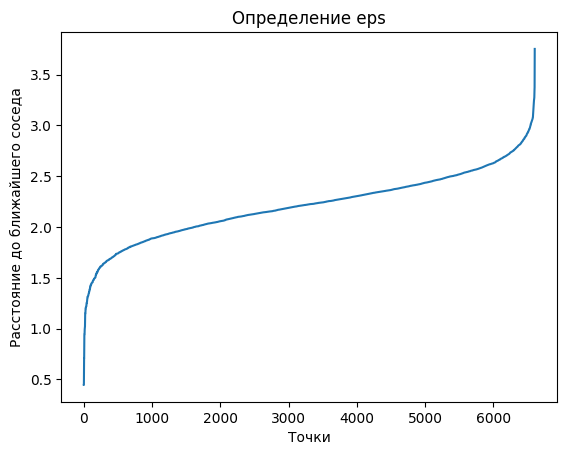

In [309]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=2)  # 2-й сосед, чтобы исключить саму точку
distances, _ = neighbors.fit(X_pca).kneighbors(X_pca)
distances = np.sort(distances[:, 1])  # Берем расстояния до второго соседа

plt.plot(distances)
plt.xlabel('Точки')
plt.ylabel('Расстояние до ближайшего соседа')
plt.title('Определение eps')
plt.show()

Значение eps нужно брать такое, где наблюдается резкий подъём.

eps = 2.6

In [310]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np

# Применение метода кластеризации KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Применение метода кластеризации DBSCAN
dbscan = DBSCAN(eps=2.6, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

# Применение метода кластеризации Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_pca)

# Оценка качества кластеризации
metrics = {
    'Adjusted Rand Index (ARI)': adjusted_rand_score,
    'Normalized Mutual Information (NMI)': normalized_mutual_info_score
}

results = {}
for name, func in metrics.items():
    results[name] = {
        'KMeans': func(y, kmeans_labels),
        'DBSCAN': func(y, dbscan_labels),
        'Agglomerative': func(y, agglo_labels)
    }

# Печать результатов
for metric, scores in results.items():
    print(f"{metric}:")
    for method, score in scores.items():
        print(f"  {method}: {score:.2f}")

Adjusted Rand Index (ARI):
  KMeans: 0.14
  DBSCAN: 0.05
  Agglomerative: 0.02
Normalized Mutual Information (NMI):
  KMeans: 0.15
  DBSCAN: 0.01
  Agglomerative: 0.09


Попробуем другой подход

Выведем матрицу корреляции для всех столбцов.

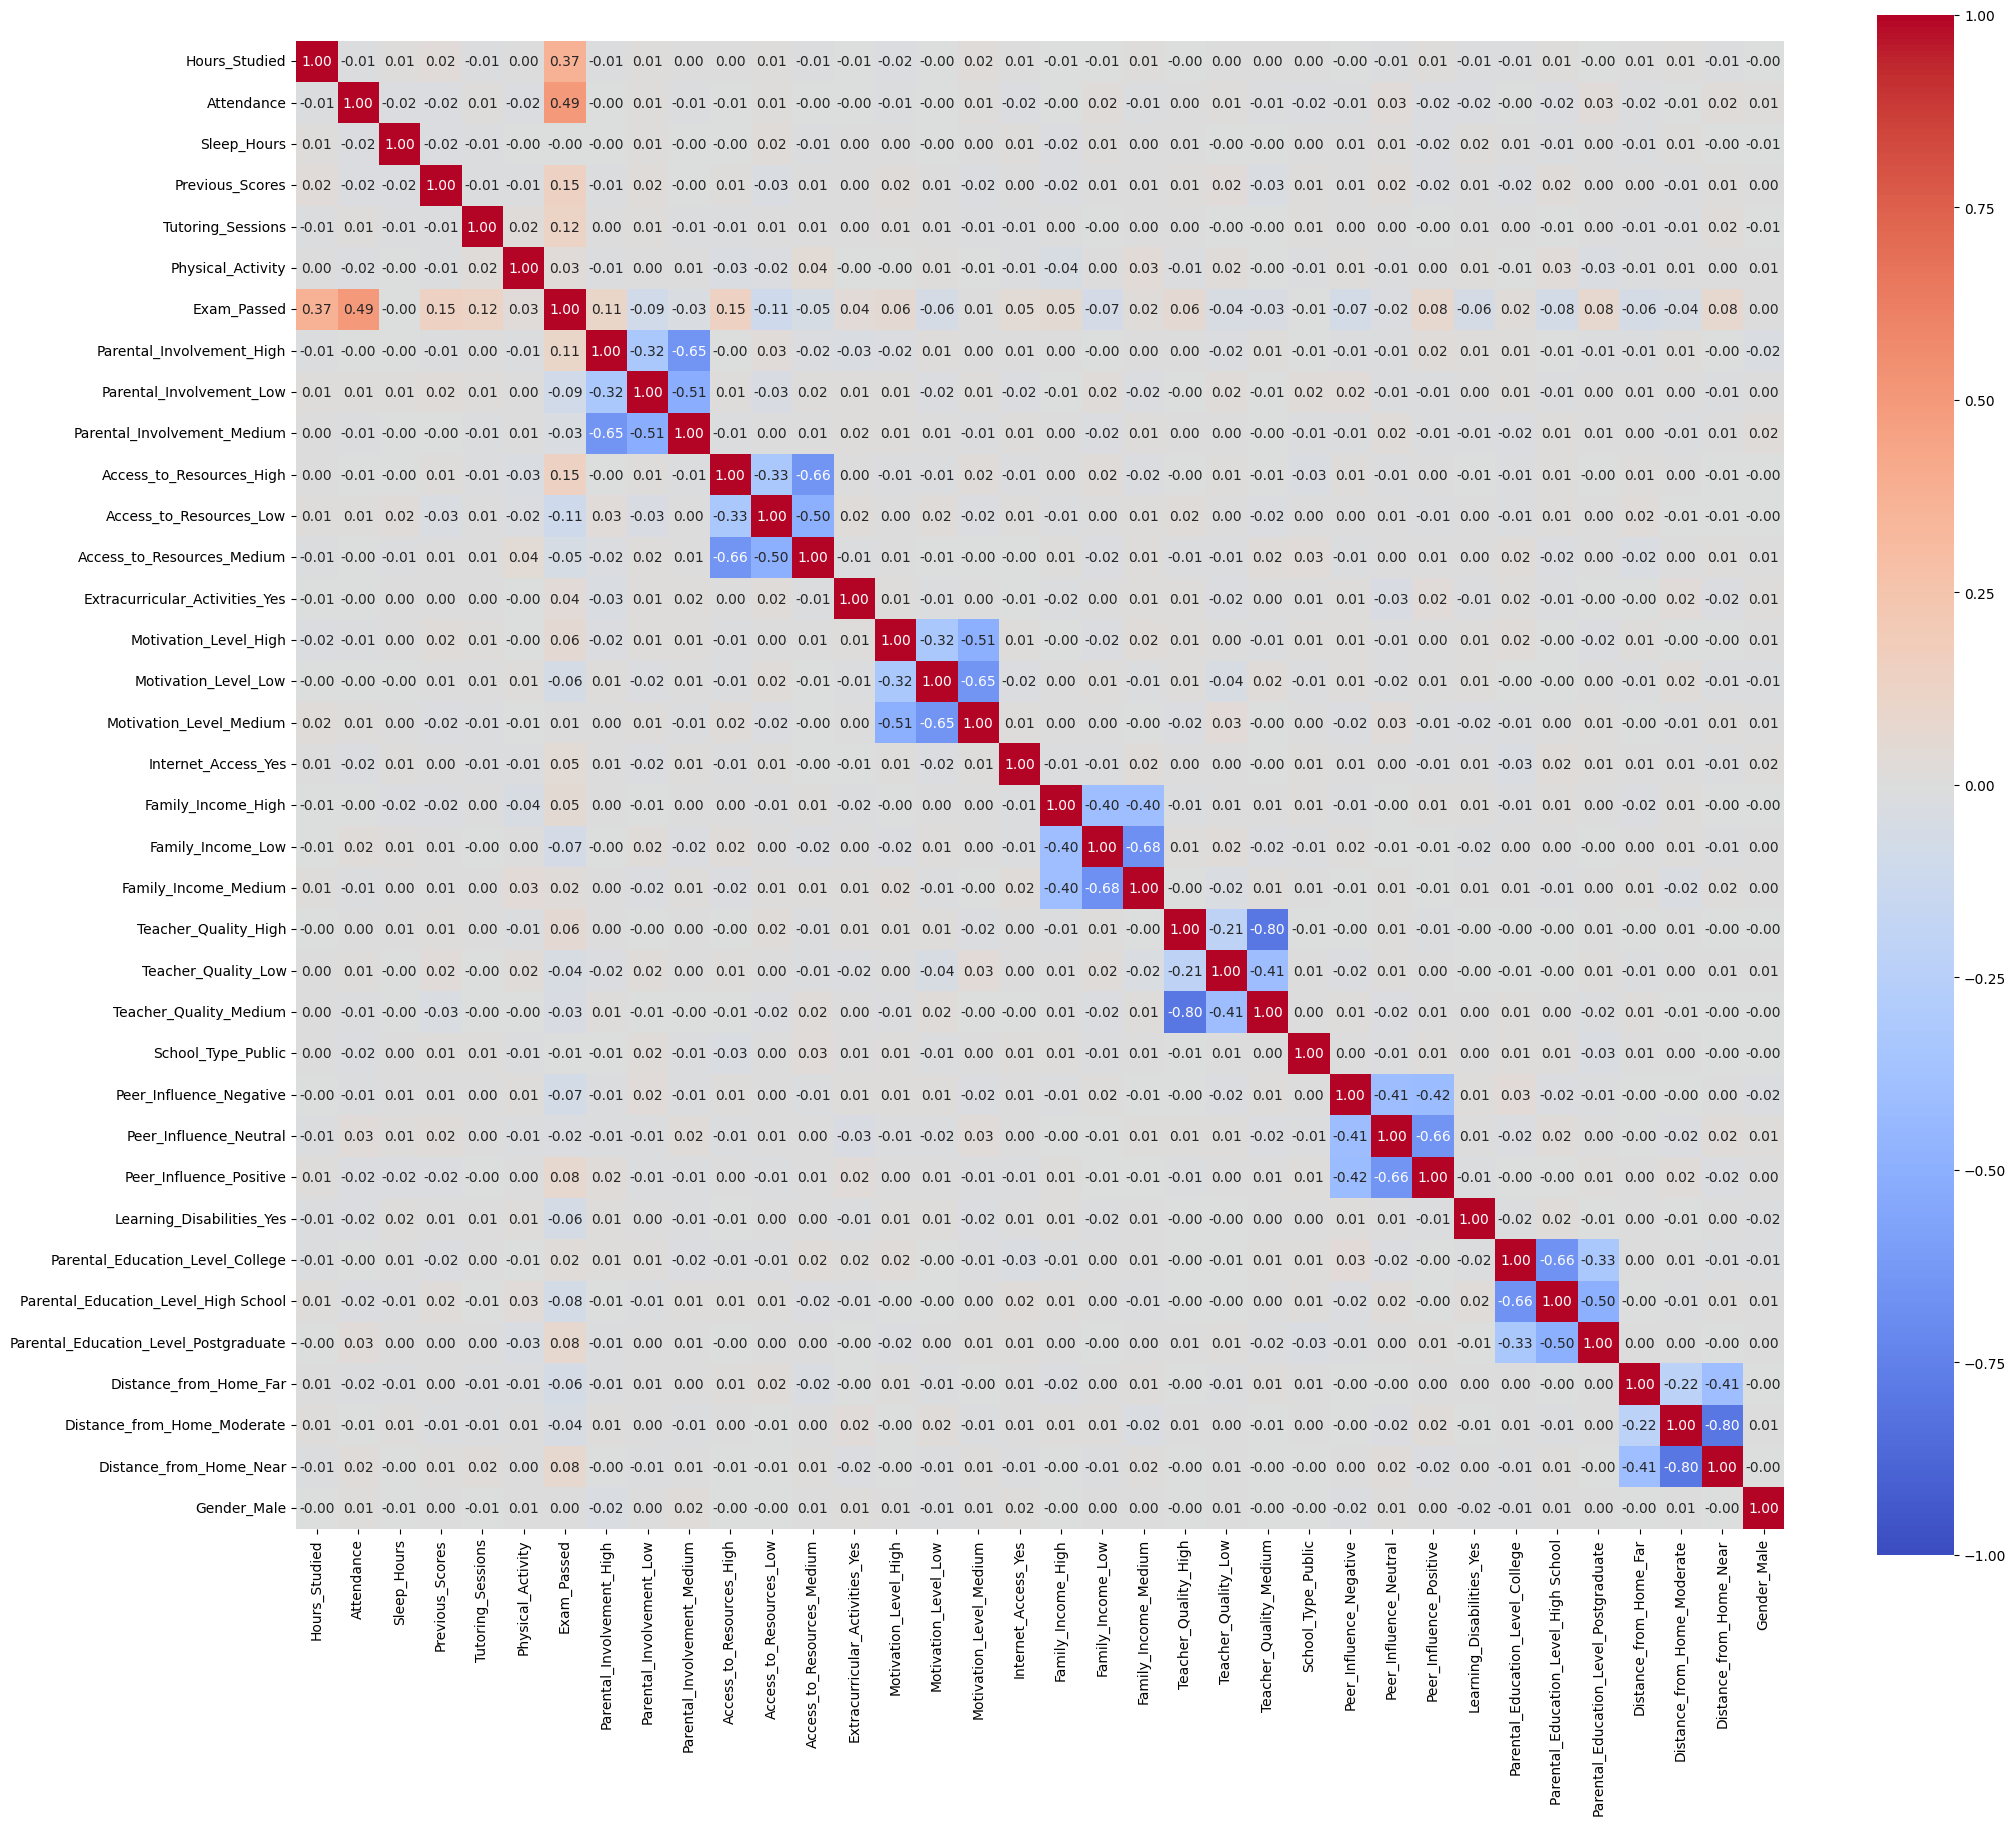

In [311]:
corr_mat = data_proc.corr(numeric_only=True)
plt.figure(figsize=(24, 20))
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Выберем только те параметры, которые коррелируют с `Exam_Passed` и слабо коррелируют между собой. Например: `Hours_Studied`, `Attendance`, `Extracurricular_Activities_Yes`

In [312]:
X_clust = X[['Hours_Studied', 'Attendance', 'Extracurricular_Activities_Yes']]

In [313]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np

# Применение метода кластеризации KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_clust)

# Применение метода кластеризации DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_clust)

# Применение метода кластеризации Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_clust)

# Оценка качества кластеризации
metrics = {
    'Adjusted Rand Index (ARI)': adjusted_rand_score,
    'Normalized Mutual Information (NMI)': normalized_mutual_info_score
}

results = {}
for name, func in metrics.items():
    results[name] = {
        'KMeans': func(y, kmeans_labels),
        'DBSCAN': func(y, dbscan_labels),
        'Agglomerative': func(y, agglo_labels)
    }

# Печать результатов
for metric, scores in results.items():
    print(f"{metric}:")
    for method, score in scores.items():
        print(f"  {method}: {score:.2f}")

Adjusted Rand Index (ARI):
  KMeans: 0.14
  DBSCAN: -0.00
  Agglomerative: 0.36
Normalized Mutual Information (NMI):
  KMeans: 0.16
  DBSCAN: 0.00
  Agglomerative: 0.25


Найдём нужные параметры для DBSCAN

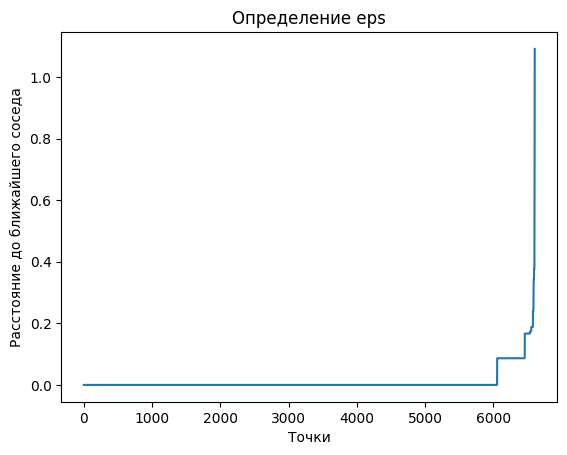

In [314]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=2)  # 2-й сосед, чтобы исключить саму точку
distances, _ = neighbors.fit(X_clust).kneighbors(X_clust)
distances = np.sort(distances[:, 1])  # Берем расстояния до второго соседа

plt.plot(distances)
plt.xlabel('Точки')
plt.ylabel('Расстояние до ближайшего соседа')
plt.title('Определение eps')
plt.show()

Значение eps нужно брать такое, где наблюдается резкий подъём.

In [315]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np

# Применение метода кластеризации KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_clust)

# Применение метода кластеризации DBSCAN
dbscan = DBSCAN(eps=0.11, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_clust)

# Применение метода кластеризации Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_clust)

# Оценка качества кластеризации
metrics = {
    'Adjusted Rand Index (ARI)': adjusted_rand_score,
    'Normalized Mutual Information (NMI)': normalized_mutual_info_score
}

results = {}
for name, func in metrics.items():
    results[name] = {
        'KMeans': func(y, kmeans_labels),
        'DBSCAN': func(y, dbscan_labels),
        'Agglomerative': func(y, agglo_labels)
    }

# Печать результатов
for metric, scores in results.items():
    print(f"{metric}:")
    for method, score in scores.items():
        print(f"  {method}: {score:.2f}")

Adjusted Rand Index (ARI):
  KMeans: 0.14
  DBSCAN: 0.00
  Agglomerative: 0.36
Normalized Mutual Information (NMI):
  KMeans: 0.16
  DBSCAN: 0.06
  Agglomerative: 0.25


Построим ещё одну т-SNE диаграмму. Кластеры стали чуть более отделимы.

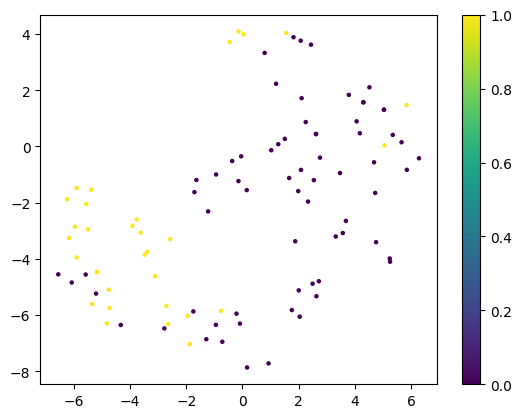

In [316]:
subset = data_proc.sample(n=100, random_state=42)
H = subset[['Hours_Studied', 'Attendance', 'Extracurricular_Activities_Yes']]
p = subset['Exam_Passed']

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
H_embedded = tsne.fit_transform(H)

plt.scatter(H_embedded[:, 0], H_embedded[:, 1], c=p, cmap='viridis', s=5)
plt.colorbar()
plt.show()

### Вывод

Данные датасета плохо подходят для задачи кластеризации, но отобрав нужные столбцы из датасета, удалось немного увеличить корректность кластеризации.